In [1]:
import pandas as pd
import ptitprince as pt
import seaborn as sns
import os
import matplotlib.pyplot as plt
import numpy as np
import os
#sns.set(style="darkgrid")
#sns.set(style="whitegrid")
#sns.set_style("white")
sns.set(style="whitegrid",font_scale=2)
import matplotlib.collections as clt

In [2]:
# settings
savefigs = True
figs_dir = '/home/apheia/Documents/Skyline Study/Survey results/skyline/Figures/Efficacy'



In [29]:
df_data = pd.read_csv ("efficacy.csv", sep= ",")


In [30]:
df = df.rename_axis('id').reset_index()

In [31]:
data_cols = [col for col in df.columns if "efficacy"  in col]


df = df[data_cols]

In [32]:
df

""
0
1
2
3
4
5
6
7
8
9


In [26]:
# give useful column names
oricols =list(df.columns)

cols=["question"+ str(x+1) for x in range(len(oricols))]

df.columns=cols



In [28]:
oricols

[]

In [7]:
df = df.rename_axis('id').reset_index()

In [9]:
# tidy up data frame: conversion from wide to long format
df=pd.wide_to_long(df, stubnames ="question", i="id", j="answer")

df.reset_index(inplace=True)





In [10]:
# fix column names order
new_cols=["id", "question", "answer"]
df.columns=new_cols

In [11]:
# sort by participant
#df_data.sort_values(by=['id'])

In [15]:
df['question']

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
1602    8
1603    8
1604    8
1605    8
1606    8
1607    8
1608    8
1609    8
1610    8
1611    8
1612    8
1613    8
1614    8
1615    8
1616    8
1617    8
1618    8
1619    8
1620    8
1621    8
1622    8
1623    8
1624    8
1625    8
1626    8
1627    8
1628    8
1629    8
1630    8
1631    8
Name: question, Length: 1632, dtype: int64

In [12]:
# Plotting
#----------------

<Figure size 432x288 with 0 Axes>

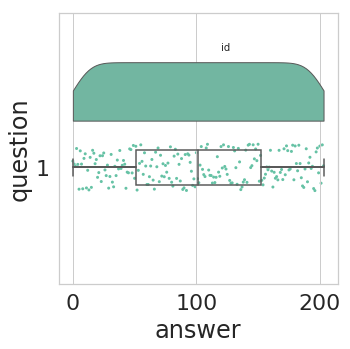

<Figure size 432x288 with 0 Axes>

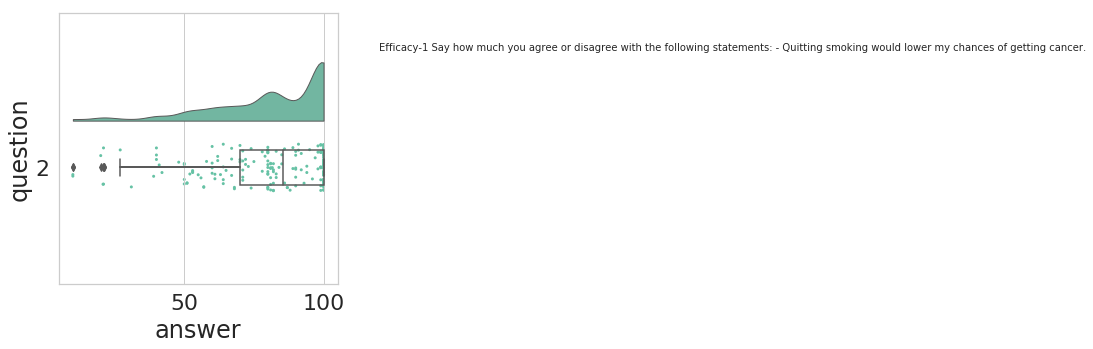

<Figure size 432x288 with 0 Axes>

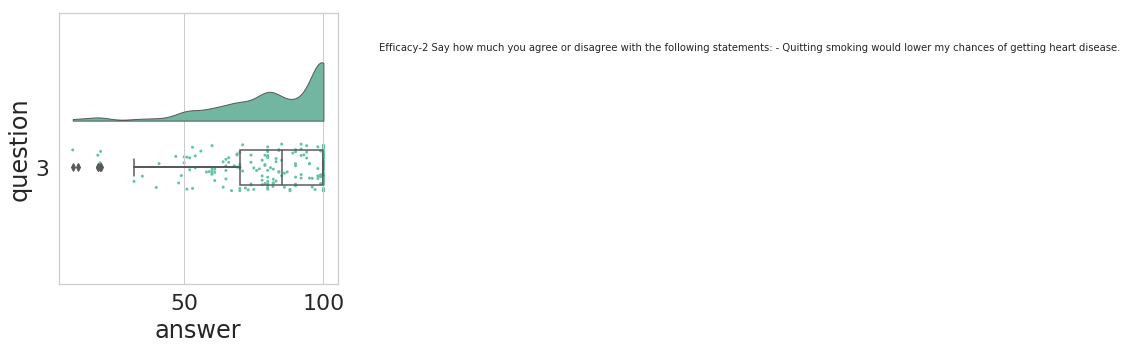

<Figure size 432x288 with 0 Axes>

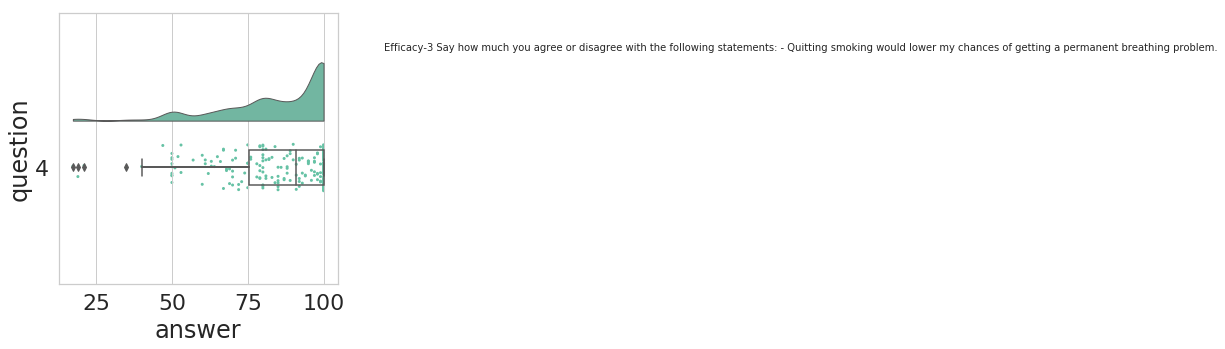

<Figure size 432x288 with 0 Axes>

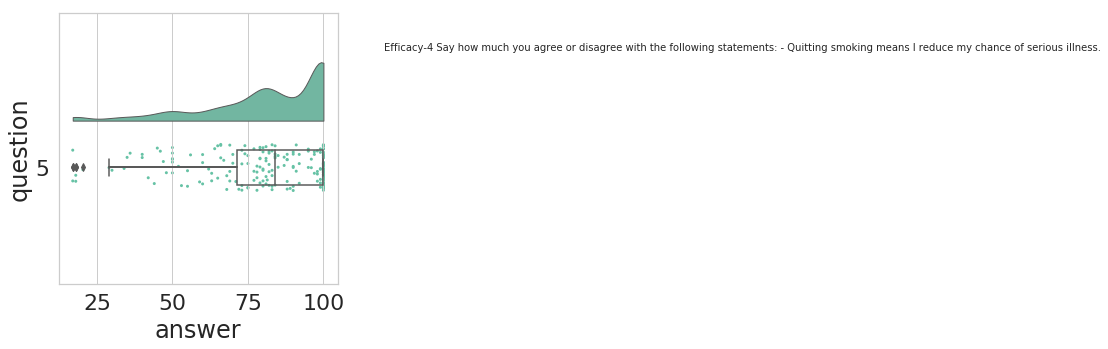

<Figure size 432x288 with 0 Axes>

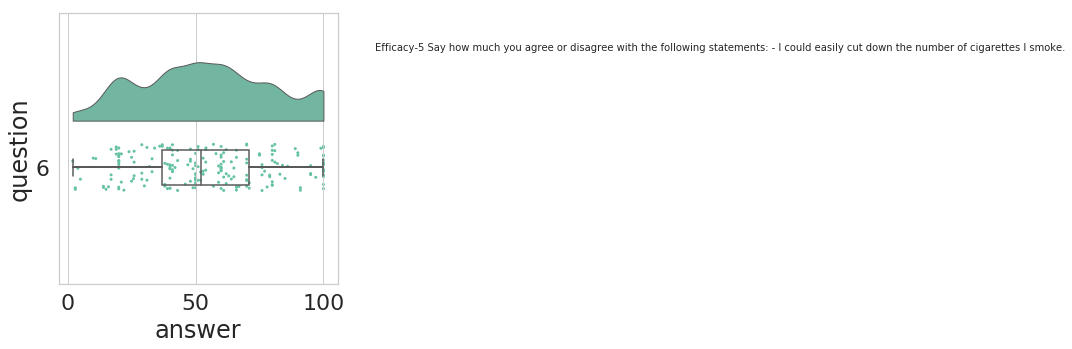

<Figure size 432x288 with 0 Axes>

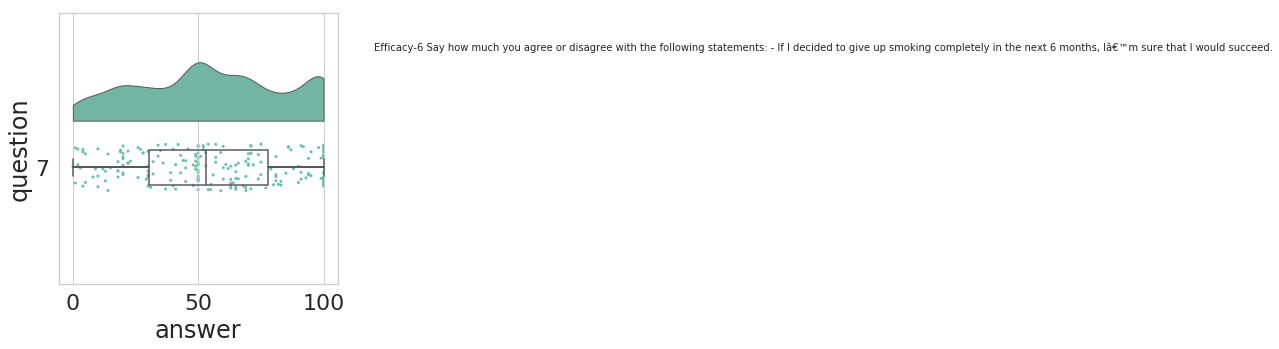

In [13]:
# plotting the clouds

#for quest in [3]:
for quest in range(1,len(np.unique(df['question']))):
    fig = plt.figure()
    # define subplot
   # ax = fig.add_subplot(5,5,quest)
    # get a subset of the dataframe corresponding to question quest
    df_plot=df.loc[df['question'] == quest]
    dx="question"; dy="answer"; ort="h"; pal = "Set2"; sigma = .2
    ax=pt.RainCloud(x = dx, y = dy, data = df_plot, palette = pal, bw = sigma,
                     width_viol = .5, figsize = (5,5), orient = ort)
    
    ax.text(120,-0.5,oricols[quest-1], wrap=True) #to account for diff number of columns in oricols and df_data
    
    #ax.text(120,0,df_comm.iloc[df_data[quest-1]], wrap=True) #to account for diff number of columns in oricols and df_data
    
    y=-0.4
   
    
    if savefigs:
        filename = 'question'+str(quest)
        plt.savefig(os.path.join(figs_dir, filename + '.jpg'), bbox_inches='tight')